# Практическая работа №1: Основы анализа и моделирования социальных сетей

Выполнила студентка гр. 3385 Ефимова Екатерина Андреевна. Вариант №6.

## Цель работы

Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.

## Основные теоретические положения


### Описательная сводка

#### Плотность сети
Для ненаправленных сетей:
$$
\text{Density} = \frac{2L}{N(N-1)}
$$

Для направленных сетей:
$$
\text{Density} = \frac{L}{N(N-1)}
$$
где $L$ — количество связей, $N$ — количество вершин.

#### Размер сети
$$
\text{Size} = N
$$

#### Диаметр сети
$$
D = \max_{i,j} d(i,j)
$$
где $d(i,j)$ — геодезическое расстояние между вершинами $i$ и $j$.

#### Коэффициент кластеризации
$$
T = \frac{3 \times \tau_{\triangle}}{\tau_{\wedge}}
$$
### Меры центральности для ненаправленных сетей

#### Центральность по степени (нормированная)
$$
C_D^{'}(n_i) = \frac{C_D(n_i)}{N-1}
$$

#### Центральность по близости (нормированный)
$$
C_C^{'}(n_i) = \frac{N-1}{\sum_{j \neq i} d(n_i,n_j)}
$$

#### Центральность по посредничеству (нормированная)
$$
C_B^{'}(n_i) = \frac{\sum_{j < k} \frac{\sigma_{jk}(n_i)}{\sigma_{jk}}}{\frac{(N-1)(N-2)}{2}}
$$
где $\sigma_{jk}$ — количество кратчайших путей между $j$ и $k$,  
$\sigma_{jk}(n_i)$ — количество таких путей, проходящих через $i$.

#### Центральность по информации
$$
C_I(n_i) = \frac{1}{c_{ii} + \frac{T - 2R}{g}}
$$

#### Центральность по информации (нормированная)
$$
C_I^{'}(n_i) = \frac{C_I(n_i)}{\sum_{i} C_I(n_i)}
$$

### Меры престижа для направленных сетей

#### Престиж по степени (нормированный)
$$
P_D^{'}(n_i) = \frac{P_D(n_i)}{N-1}
$$

#### Престиж по близости
$$
P_P(n_i) = \frac{I_i}{g-1} \cdot \frac{I_i}{\sum d(n_j, n_i)}
$$
где $I_i$ — количество вершин, достижимых из $i$,  
$C_C^{in}(i)$ — входящая центральность по близости.

#### Престиж по рангу
Решается система уравнений:
$$
\left(\frac{1}{a}I - X^T\right)P_R = x
$$
где:  
- $X$ — социоматрица  
- $X^T$ — транспонированная матрица  
- $a = \frac{1}{\lambda_1}$, где $\lambda_1$ — максимальное собственное значение матрицы $X$  
- $x$ — вектор сумм столбцов  
- $I$ — единичная матрица  

Нормированный престиж:
$$
P_R^{'}(n_i) = \frac{P_R(n_i)}{\max(P_R)}
$$

## Постановка задачи

С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1. Импорт библиотек и чтение данных

In [ ]:
# Импорт библиотек
library(igraph)
library(statnet)

# Чтение данных
florentine <- read.csv("florentine_marital.csv",  skip = 1)
florentine
inet <- graph_from_adjacency_matrix(as.matrix(florentine))
snet <- as.matrix(as_adjacency_matrix(inet))
snet

### 2. Преобразование в список ребер

In [12]:
all(as.matrix(inet) == snet)
edgelist_inet <- as.matrix(inet, matrix.type = "edgelist")

# Первые 5 элементов списка ребер
head(edgelist_inet, 5)

[1] TRUE

Acciaiuoli,Medici
Albizzi,Ginori
Albizzi,Guadagni
Albizzi,Medici
Barbadori,Castellani


### 3. Присвоение имен вершинам

In [13]:
vertex_names <- colnames(florentine)   
rownames(snet) <- vertex_names
colnames(snet) <- vertex_names
snet

,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
Acciaiuoli,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
Castellani,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
Ginori,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guadagni,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
Lamberteschi,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Medici,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
Pazzi,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### 4. Построение ненаправленной сети

In [14]:
net1 <- network(snet, matrix.type = "adjacency", directed = FALSE)

### 5. Визуализация сети

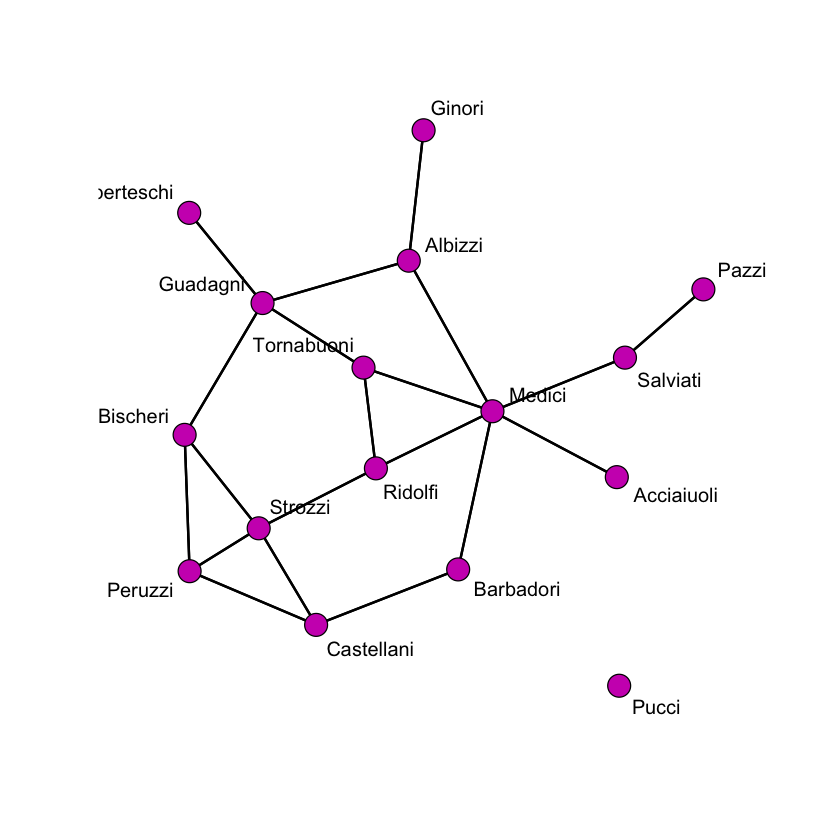

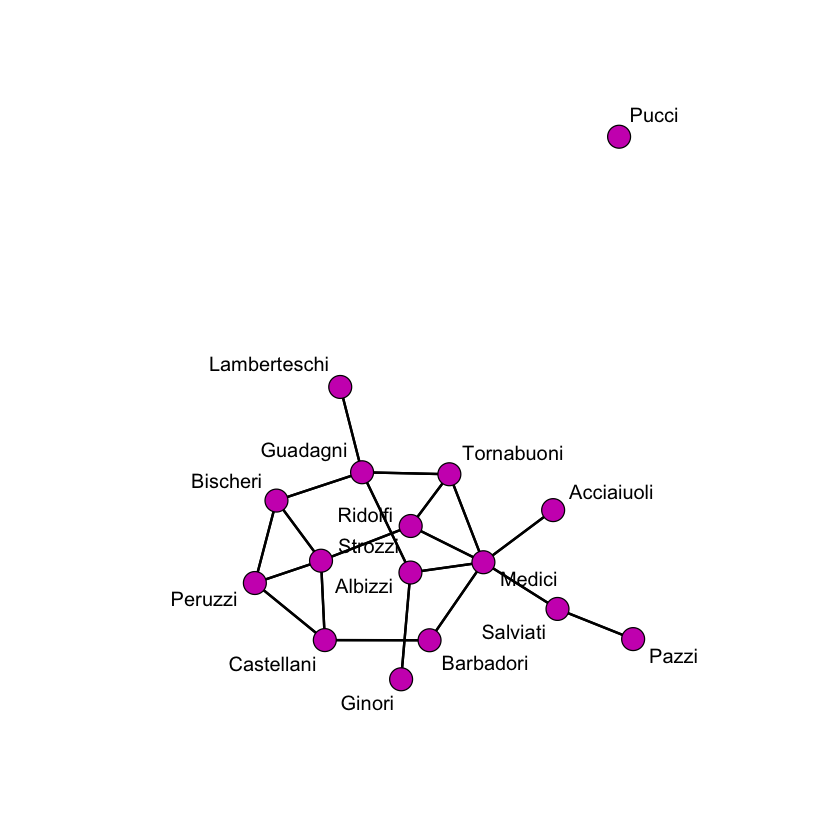

In [15]:
# Алгоритм Фрюхтермана—Рейнгольда
gplot(net1, gmode = "graph", mode = "fruchtermanreingold",
      displaylabels = TRUE, vertex.col = 6)

# Алгоритм Камада—Каваи
gplot(net1, gmode = "graph", mode = "kamadakawai",
      displaylabels = TRUE, vertex.col = 6)

### 6. Описательная сводка сети

In [16]:
summary(net1)

Network attributes:
  vertices = 16
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 20 
   missing edges = 0 
   non-missing edges = 20 
 density = 0.1666667 

Vertex attributes:
  vertex.names:
   character valued attribute
   16 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]    9    1
 [2,]    6    2
 [3,]    7    2
 [4,]    9    2
 [5,]    5    3
 [6,]    9    3
 [7,]    7    4
 [8,]   11    4
 [9,]   15    4
[10,]   11    5
[11,]   15    5
[12,]    8    7
[13,]   16    7
[14,]   13    9
[15,]   14    9
[16,]   16    9
[17,]   14   10
[18,]   15   11
[19,]   15   13
[20,]   16   13

### 7. Пятичисловая сводка сети

In [18]:
#a) Размер сети
network.size(net1)

#b) Плотность сети
gden(net1)  #(2*20)/(16*15) = 40/240
# Вывод: 
# Связей между семьями немного, примерно 17% от всех возможных.
# Это показывает, что сеть довольно разреженная — браки между разными семьями случались нечасто.

#c) Количество компонент связности
components(net1)
# Вывод:
# Сеть не полностью связана: есть изолированная семья (Pucci), которая не имеет связей с другими.

#d) Диаметр сети
lgc <- component.largest(net1, result = "graph")
gd <- geodist(lgc)
max(gd$gdist)
# Вывод:
# Самое большое расстояние между двумя семьями — 5 шагов.
# Значит, семьи в целом связаны, но часто через несколько посредников.

#e) Коэффициент кластеризации
gtrans(net1, mode = "graph")
# Низкий уровень триад (замкнутых троек).
# То есть если две семьи связаны с третьей, они редко связаны между собой.

[1] 16

[1] 0.1666667

[1] 2

[1] 5

[1] 0.1914894

### 8. Таблица центральности

In [20]:
isolated <- which(degree(net1, gmode = "graph") == 0)
net2 <- net1
delete.vertices(net2, isolated)
g <- network.size(net2)

# центральность по степени
C_D <- degree(net2, gmode = "graph")/(g-1)

# центральность по близости
C_C <- closeness(net2, gmode = "graph")

# центральность по посреднечеству
C_B <- betweenness(net2, gmode = "graph")
C_B <- C_B/((g-1)*(g-2)/2)

# центральность по информациии
C_I <- infocent(net2, gmode = "graph")
C_I <- C_I/sum(C_I)

centrality_table <- data.frame(
  Vertex = network.vertex.names(net2),
  Degree = C_D,
  Closeness = C_C,
  Betweenness = C_B,
  Information = C_I
)
centrality_table

Vertex,Degree,Closeness,Betweenness,Information
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Acciaiuoli,0.07142857,0.3684211,0.00000000,0.04943215
Albizzi,0.21428571,0.4827586,0.21245421,0.07408484
Barbadori,0.14285714,0.4375000,0.09340659,0.06816655
Bischeri,0.21428571,0.4000000,0.10439560,0.07427531
Castellani,0.21428571,0.3888889,0.05494505,0.07093098
Ginori,0.07142857,0.3333333,0.00000000,0.04309479
Guadagni,0.28571429,0.4666667,0.25457875,0.08190476
Lamberteschi,0.07142857,0.3255814,0.00000000,0.04562892
Medici,0.42857143,0.5600000,0.52197802,0.09502877


### 9. 2-7 для направленной сети

In [29]:
#2
krackhardt <- read.csv("krackhardt_friendship.csv", header = FALSE, skip = 2)
inet1 <- graph_from_adjacency_matrix(as.matrix(krackhardt))
snet1 <- as.matrix(as_adjacency_matrix(inet1))
snet1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
V1,0,1,0,1,0,0,0,1,0,0,⋯,1,0,0,0,1,0,0,0,0,0
V2,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,1
V3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,1,0,0
V4,1,1,0,0,0,0,0,1,0,0,⋯,1,0,0,0,1,1,0,0,0,0
V5,0,1,0,0,0,0,0,0,1,0,⋯,0,0,1,0,0,1,0,1,0,1
V6,0,1,0,0,0,0,1,0,1,0,⋯,1,0,0,0,0,1,0,0,0,1
V7,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
V8,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
V9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
V10,0,0,1,0,1,0,0,1,1,0,⋯,1,0,0,0,1,0,0,0,1,0


In [30]:
#3
vertex_names1 <- c(
  "Alice", "Bob", "Carol", "David", "Eve", "Frank", "Grace",
  "Hank", "Ivy", "Jack", "Kathy", "Leo", "Mona", "Nina",
  "Oscar", "Paul", "Quinn", "Rita", "Steve", "Tracy", "Uma"
)
rownames(snet1) <- vertex_names1
colnames(snet1) <- vertex_names1

In [31]:
#4
net3 <- network(snet1, matrix.type = "adjacency", directed = TRUE)

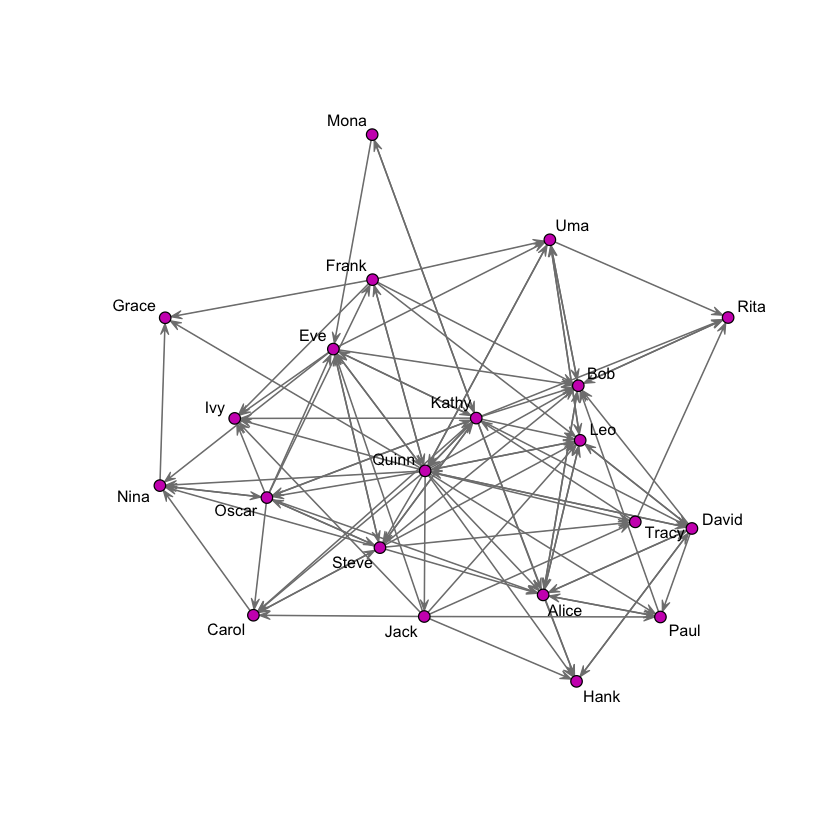

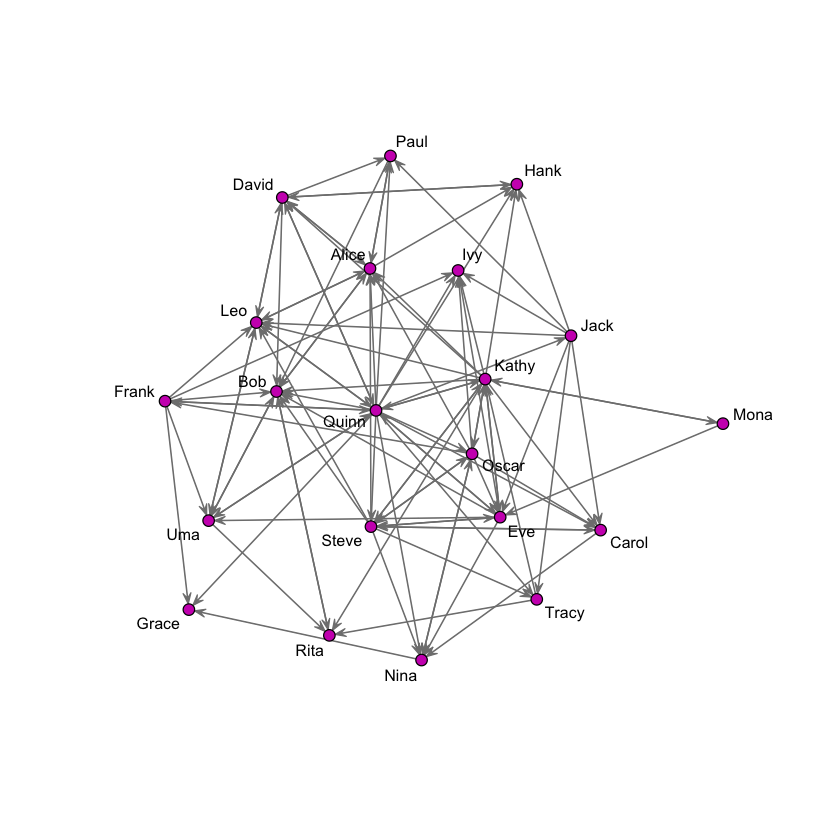

In [32]:
#5
plot(net3,
     displaylabels = TRUE,
     vertex.col = 6,
     edge.lwd = 0.5,     
     edge.col = "grey50",
     mode = "fruchtermanreingold", pad = 0.04, label.cex = 0.8)

plot(net3,
     displaylabels = TRUE,
     vertex.col = 6,
     edge.lwd = 0.5,     
     edge.col = "grey50",
     mode = "kamadakawai",pad = 0.04,  label.cex = 0.8)

In [33]:
#6
summary(net3)

Network attributes:
  vertices = 21
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 102 
   missing edges = 0 
   non-missing edges = 102 
 density = 0.2428571 

Vertex attributes:
  vertex.names:
   character valued attribute
   21 valid vertex names

No edge attributes

Network edgelist matrix:
       [,1] [,2]
  [1,]    2    1
  [2,]    4    1
  [3,]   11    1
  [4,]   12    1
  [5,]   15    1
  [6,]   16    1
  [7,]   17    1
  [8,]   19    1
  [9,]    1    2
 [10,]    4    2
 [11,]    5    2
 [12,]    6    2
 [13,]   11    2
 [14,]   16    2
 [15,]   17    2
 [16,]   18    2
 [17,]   19    2
 [18,]   21    2
 [19,]   10    3
 [20,]   11    3
 [21,]   15    3
 [22,]   17    3
 [23,]   19    3
 [24,]    1    4
 [25,]    8    4
 [26,]   11    4
 [27,]   12    4
 [28,]   17    4
 [29,]   10    5
 [30,]   11    5
 [31,]   13    5
 [32,]   15    5
 [33,]   17    5
 [34,]   19    5
 [35,]   15    6
 [36,]   17    6
 [37,]    6    7


In [37]:
#7
#a)размер сети
g1 <- network.size(net3)

#b)плотность сети
gden(net3) #102/(21*20)
# Вывод:
# Примерно 24% всех возможных связей реализованы.
# Это говорит о достаточно хорошем уровне дружеских контактов между менеджерами — сеть умеренно плотная.

#с)количество компонент связности
comp <- clusters(inet1, mode = "strong")
comp$no 
# Вывод:
# Есть небольшие изолированные группы — значит, 
# информация или распоряжения могут не доходить напрямую ко всем менеджерам

#d)диаметр сети
lgc1 <- largest_component(inet1, mode = "strong")
diameter(lgc1, directed = TRUE)
# Вывод:
# Максимальное расстояние между двумя менеджерами — 5 шагов.
# Даже самые удалённые коллеги соединены короткой цепочкой знакомств.

#e) коэффициент кластеризации
gtrans(net3, mode = "disgraph")
# Вывод:
# Относительно высокий уровень «треугольников» (общих друзей).
# Это значит, что если два менеджера дружат с одним и тем же человеком, велика вероятность, 
# что они дружат и между собой.

[1] 0.2428571

[1] 3

[1] 5

[1] 0.4610526

### 10. Таблица мер престижа

In [38]:
# Престиж по степени
P_D <- degree(net3, cmode = "indegree") / (g1 - 1)

# Престиж по близости
P_С <- igraph::closeness(inet1, mode = "in", normalized = FALSE)
I_i <- colSums(igraph::distances(inet1, mode = "in") > 0)
P_P <- (I_i^2 / (g1 - 1)) * P_С

# Престиж по рангу
X <- snet1
lambda_1 <- max(Re(eigen(X)$values))
l1 <- ceiling(lambda_1)
a <- 1 / l1
x <- colSums(X)
n <- ncol(X)
I <- diag(n)
X_t <- t(X)
left_side <- (1/a) * I - X_t
P_R <- solve(left_side, x)
P_R <- P_R / max(P_R)

# Таблица престижа
prestige_table <- data.frame(
  Vertex = network.vertex.names(net3),
  Degree = P_D,
  Closeness = P_P,
  Rank = P_R
)
prestige_table

# Выводы:
# Bob, Alice, Leo и Quinn — ключевые менеджеры сети:
# они имеют высокий престиж по рангу и престиж по близости,
# активно связаны с другими и формируют ядро, через которое проходит основная коммуникация

# Jack, Mona и Frank — периферийные менеджеры с низким влиянием:
# мало связей, удалены от остальных и слабое воздействие на сеть.

# Средняя группа менеджеров (Carol, David, Eve и др.) имеет средние показатели и выполняет локальные роли,
# поддерживая связь между ядром и периферией сети.

,Vertex,Degree,Closeness,Rank
,<chr>,<dbl>,<dbl>,<dbl>
V1,Alice,0.40,0.7142857,0.90494369
V2,Bob,0.50,0.7407407,1.00000000
V3,Carol,0.25,0.5263158,0.40965019
V4,David,0.25,0.5882353,0.61649867
V5,Eve,0.30,0.5405405,0.43965636
V6,Frank,0.10,0.4444444,0.19382663
V7,Grace,0.15,0.4444444,0.25240576
V8,Hank,0.25,0.5882353,0.52267420
V9,Ivy,0.30,0.5000000,0.45404030


## Выводы

В ходе работы освоены основные функции и возможности пакетов igraph и statnet для анализа социальных сетей.
Получен практический опыт работы с социоматрицами, списками ребер и преобразованием данных между различными представлениями сети.
Продемонстрирована визуализация сетей с помощью алгоритмов укладки (Fruchterman-Reingold и Kamada-Kawai).
Освоены методы вычисления размеров сети, плотности, компонент связности, диаметра и коэффициента кластеризации.
Получены навыки расчета мер центральности и престижа.